<h2>Import Libraries

In [45]:
import cv2
import imghdr
import os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.regularizers import l2

<h2>Remove Faulty Images

In [46]:
data_dir = os.path.join("flowers", "data") 
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

<h2>Visualize Images

Found 4999 files belonging to 5 classes.


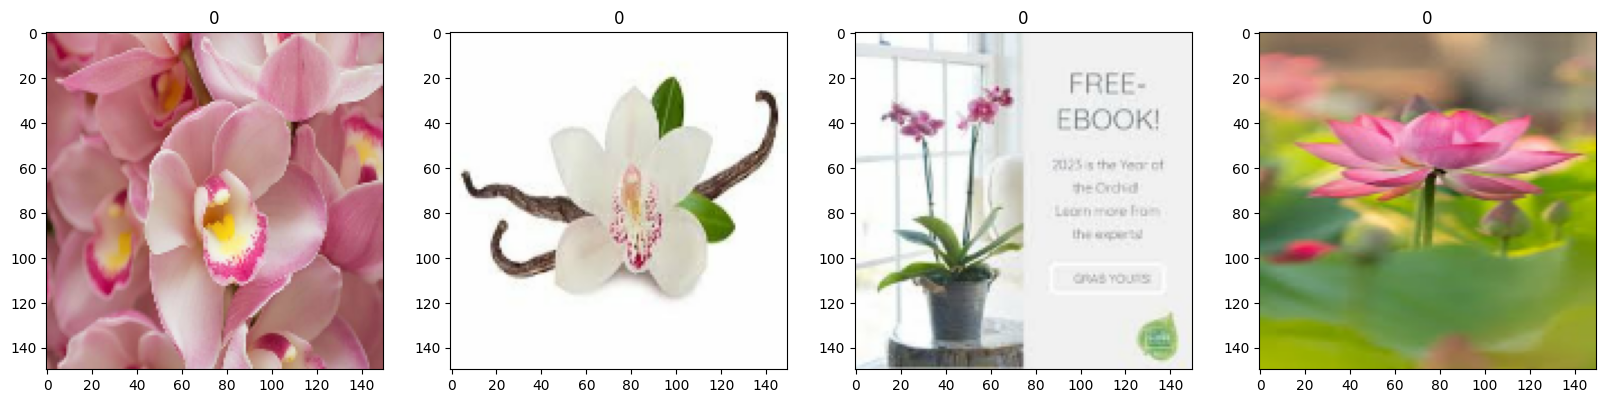

In [47]:
data = image_dataset_from_directory(data_dir, image_size=(150, 150), batch_size=5)

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(np.argmax(batch[1][idx]))

plt.show()

<h2>Process Data

In [48]:
data = data.map(lambda x, y: (x / 255.0, y))

<h2>Get Train, Test, And Validation Set

In [49]:
data_size = len(data)
train_size = int(data_size * 0.7)
val_size = int(data_size * 0.2)
test_size = int(data_size * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

<h2>Train Model

In [87]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Adjust the number of units based on your number of classes

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_98 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_97 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_98 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 34, 34, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_99 (MaxPooling2D) │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 512)            │     4,735,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,757,445 (18.15 MB)

 Trainable params: 4,757,445 (18.15 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9231 - loss: 0.2337 - val_accuracy: 0.7500 - val_loss: 1.2279
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9501 - loss: 0.1572 - val_accuracy: 0.7630 - val_loss: 1.2295
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 91s 129ms/step - accuracy: 0.9473 - loss: 0.1663 - val_accuracy: 0.7290 - val_loss: 1.4474
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9529 - loss: 0.1512 - val_accuracy: 0.7710 - val_loss: 1.3878
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.9737 - loss: 0.0952 - val_accuracy: 0.6800 - val_loss: 3.0250
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 82s 118ms/step - accuracy: 0.9575 - loss: 0.1563 - val_accuracy: 0.7910 - val_loss: 1.6969
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9753 - loss: 0.0939 - val_accuracy: 0.7710 - val_loss: 1.5094
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9770 - loss: 0.0917 

<h2>Evaluate Model

In [85]:
test_loss, test_acc = model.evaluate(test)
print(f"Test loss: {test_loss}")
print(f'Test accuracy: {test_acc}')

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7769 - loss: 1.3774
Test loss: 1.7748428583145142
Test accuracy: 0.7595190405845642


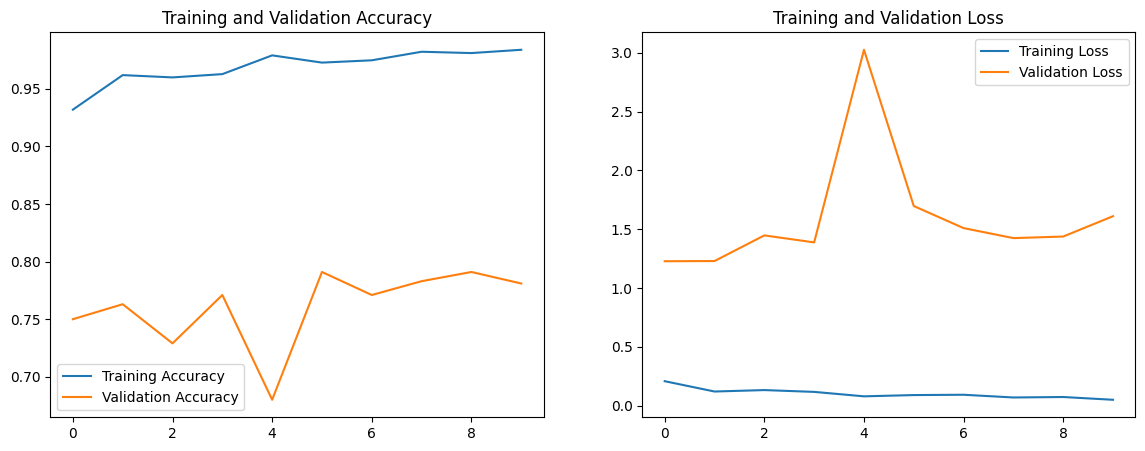

In [86]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_history(hist)

<h2>Save Model

In [58]:
model.save('cnn_flower_classification_model-1.h5')